In [1]:
import sys, os
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
sys.path.append("../")

In [3]:
from Transformers import UNetDataset, ChannelsFirst, ToTensor, Rescale

In [4]:
DATA_DIR_DEEPTHOUGHT="/storage/yw18581/data"
data_dir = DATA_DIR_DEEPTHOUGHT
train_test = os.path.join(data_dir, "train_validation_test")

In [5]:
data = np.load("/storage/yw18581/data/train_validation_test/Xy_train+val_clean_300_24_10_25.npz")
x = data["x"]
y = data['y']

In [6]:
composed = transforms.Compose([Rescale(.25), ChannelsFirst(), ToTensor()])

In [7]:
train_dataset = UNetDataset(x, y, transform=composed)

In [8]:
data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)

In [9]:
torch.cuda.empty_cache() 

##### in UNet_torch_like_keras.py, model defines as the previously used keras model

In [10]:
from UNet_torch_like_keras import UNet, dice_loss

In [11]:
net_keras_like = UNet()

In [12]:
criterion = dice_loss

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [14]:
net_keras_like.to(device)

UNet(
  (conv_block_down1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_bloc

In [15]:
import torch.optim as optim


optimizer = optim.Adam(net_keras_like.parameters(), lr=1e-5)

In [ ]:
for epoch in range(100):
    print("Epoch {}\n".format(epoch+1))
    running_loss = 0.0
    for i, batch in enumerate(data_loader):
        inputs = batch['image'].float().to(device)
        labels = batch['mask'].float().to(device)
        
        optimizer.zero_grad()
        outputs = net_keras_like(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini_batches
            print('[%d, %5d] loss: %.3f' % 
                 (epoch + 1, i + 1, running_loss / 20))

print('Finished Training')

Epoch 1

[1,    20] loss: -0.029
[1,    40] loss: -0.058
[1,    60] loss: -0.087
Epoch 2

[2,    20] loss: -0.029
[2,    40] loss: -0.057
[2,    60] loss: -0.087
Epoch 3

[3,    20] loss: -0.030
[3,    40] loss: -0.058
[3,    60] loss: -0.087
Epoch 4

[4,    20] loss: -0.030
[4,    40] loss: -0.058


In [17]:
import matplotlib.pyplot as plt

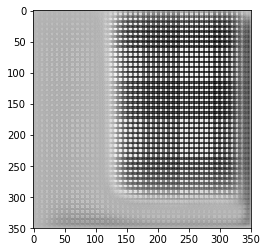

In [20]:
plt.imshow(outputs[2][0,...].cpu().detach().numpy(), cmap='gray')

In [21]:
test_data = np.load("/storage/yw18581/data/train_validation_test/Xy_test_clean_300_24_10_25.npz")
x_test = test_data["x"]
y_test = test_data['y']

test_dataset = UNetDataset(x_test, y_test, transform=composed)

test_data_loader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=4)

In [ ]:
for i, batch in enumerate(test_data_loader):
    plt.imshow()